
# 如何选择聚类模块数目

一般来说，类似**K-means**聚类算法需要我们提取指定聚类得到的cluster数目。那么问题来了，如何为聚类选择一个适合的cluster数目呢？  

很遗憾，上面的问题没有一个确定的答案。不过我们可以基于不同聚类过程中使用的相似性算法和模块划分参数，选择一个最合适的数目。下面介绍不同的方法，帮助我们在K-means，PAM和层次聚类中选择合适的聚类数目，这些方法包括直接方法和统计检验方法。

  + **直接方法**  设置一些适合的划分标准，比如*elbow*和*average silhouette*法
  + **统计检验方法** 就是常用的假设检验方法，比如gap statistic  
  

## 1. 安装相关软件包

In [2]:
# 如果因为缺少某些包而安装失败，请先安装其他依赖包再重新安装，安装时间比较久
# 可能需要依赖lme4，cowplot，ggpubr，FactoMineR
# 其中cowplot需要R3.3版本，其他版本可以试试用下面命令安装
devtools::install_url("https://github.com/wilkelab/cowplot/archive/0.6.3.zip")
if(!require(devtools)) install.packages('devtools')
if(!require(factoextra)) devtools::install_github('kassambara/factoextra')

其中**FactoMineR**包新版要求使用R3.3.3版本，如果版本不合适可能会安装不上。可以到官网查找对应的软件包文件，官网[链接](https://cran.r-project.org/src/contrib/Archive/FactoMineR/)上列出许多文件，可以根据不同R版本发布的时间，挑选合适的版本手动安装。其他软件包可以使用下面命令进行安装

In [3]:
pkgs <- c("cluster",  "NbClust")
install.packages(pkgs)

Installing packages into ‘/home/l0o0/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpJxbuOV/downloaded_packages’


上面在安装过程中，如果出现问题，请仔细查看报错信息，根据这些信息上网搜索。  
加载上面几个软件包

In [9]:
library(factoextra)
library(cluster)
library(NbClust)

## 2. 数据准备阶段
这里我们使用**iris**数据集，把species一列去掉。

In [2]:
# load the data
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
# remove species column
iris.scaled = scale(iris[,-5])
head(iris.scaled)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


## 3. 三种聚类方法的结果

这里演示了**stat**包中的**k-means()**，**cluster**包中的**pama()**的使用，把上面的归一化后的数据分成3个cluster。

In [8]:
# K-means clustering
set.seed(123)
km.res = kmeans(iris.scaled, 3, nstart=25)
# k-means  group number of each observation
str(km.res)
km.res$cluster

List of 9
 $ cluster     : int [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:3, 1:4] -1.0112 1.1322 -0.0501 0.8504 0.0881 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 596
 $ withinss    : num [1:3] 47.4 47.5 44.1
 $ tot.withinss: num 139
 $ betweenss   : num 457
 $ size        : int [1:3] 50 47 53
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

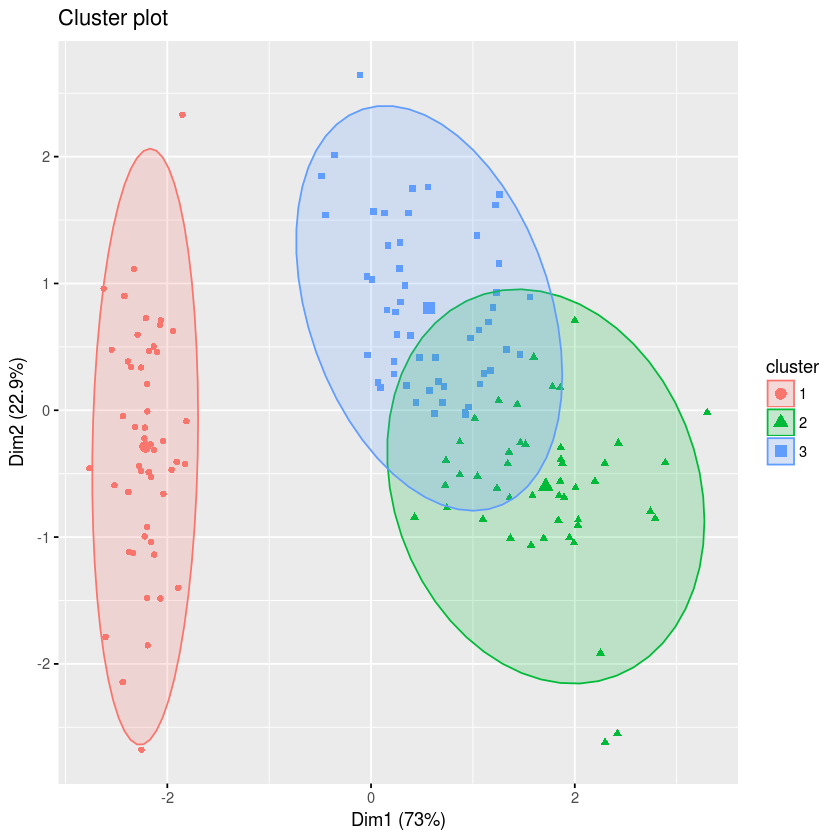

In [5]:
# visualize k-means result
fviz_cluster(km.res, data=iris.scaled, geom='point', stand=FALSE, ellipse.type='norm')

In [6]:
# PAM clustering
pam.res = pam(iris.scaled, 3)
# str(pam.res)
pam.res$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 2 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

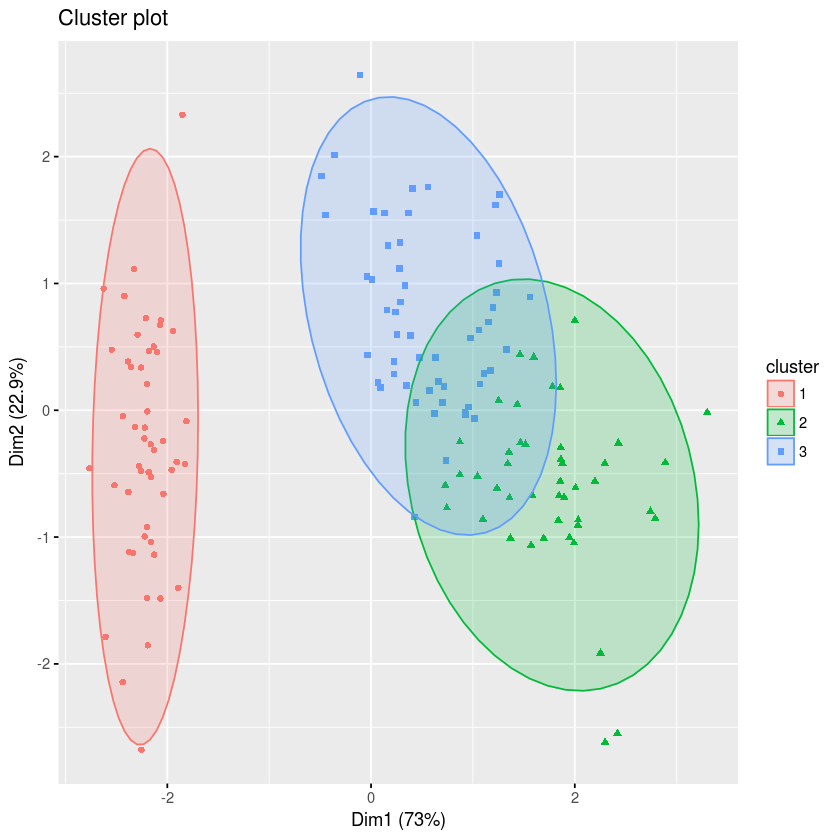

In [11]:
# visualize pam clusters
fviz_cluster(pam.res, stand=FALSE, geom='point', ellipse.type = 'norm')

如果想知道更多关于划分聚类的方法可以参考[链接](http://www.sthda.com/english/wiki/partitioning-cluster-analysis-quick-start-guide-unsupervised-machine-learning)。 
另一个是R中内建的方法**hclust()**:

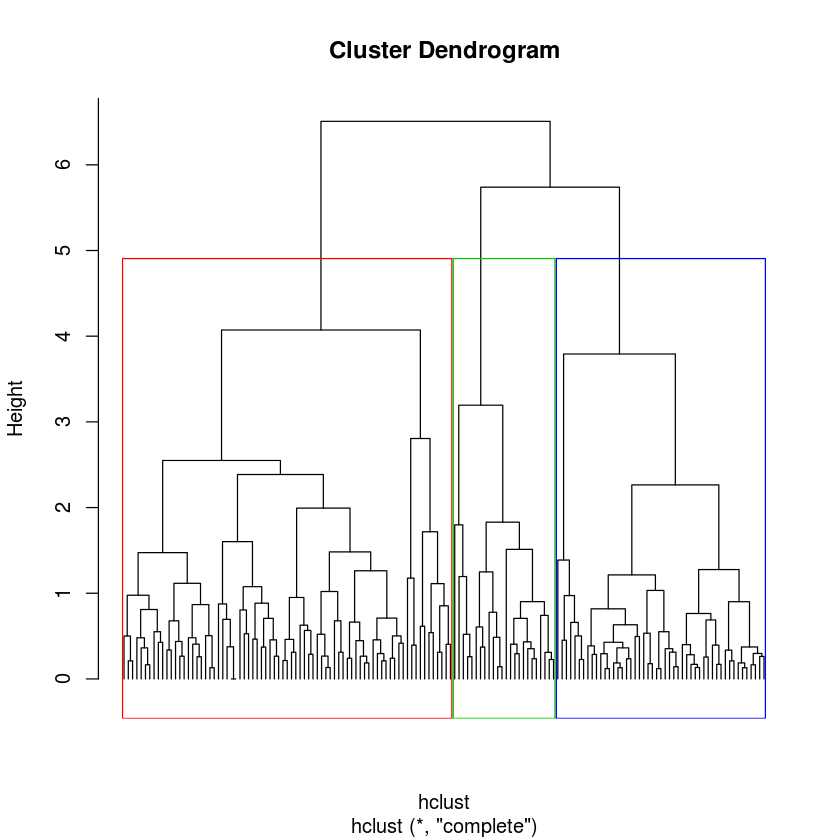

In [7]:
# 计算两两间的距离，计算方法比较多，这里选择欧几里德距离
dist.res = dist(iris.scaled, method='euclidean')

# 进行层次聚类，不同的算法说明可以查看函数帮助信息
hc = hclust(dist.res, method='complete') 
# 展示聚类结果
plot(hc, labels=FALSE, hang=-1, xlab='hclust')
# 为3个group添加方框，原来还有这个函数，真神奇
rect.hclust(hc, k=3, border=2:4)

In [9]:
# 把层次聚类的结果分成3组 
hc.cut = cutree(hc,k=3)
hc.cut

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 2 2 2 2 3 3 3 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

对于更多的关于层次聚类的知识，可以移步：[Hierachical clustering](http://www.sthda.com/english/wiki/hierarchical-clustering-essentials-unsupervised-machine-learning)  


## 4. 确定最佳分组数目的3种方法
这里介绍3种常用的方法：**Elbow method（肘部法则）**，**silhouette method** 和 **gap statistic**。

### 4.1 Elbow method 
在聚类分割算法中，比如K-means聚类，为了确定不同的分类，需要保证每个类分组总变异量之和最小，用公式  
$$
minimize \;(\sum_{k=1}^{k}W(C_k))
$$
这里的$C_k$是第k个分组，$W(C_k)$是对应分组的组内总变量值（within-cluster variation）。
具体的算法过程可以简述如下：

> 1. 对不同的k值，分别进行聚类。如K-means中k可以取从1到10  
> 2. 对每个k值，计算每个组的组内平方各（within-cluster sum of square）的和
> 3. 绘制k值和组内平方和的总和的趋势图 
> 4. 从图上的转折点确定最佳分组数目 

下面用K-means的结果试试  

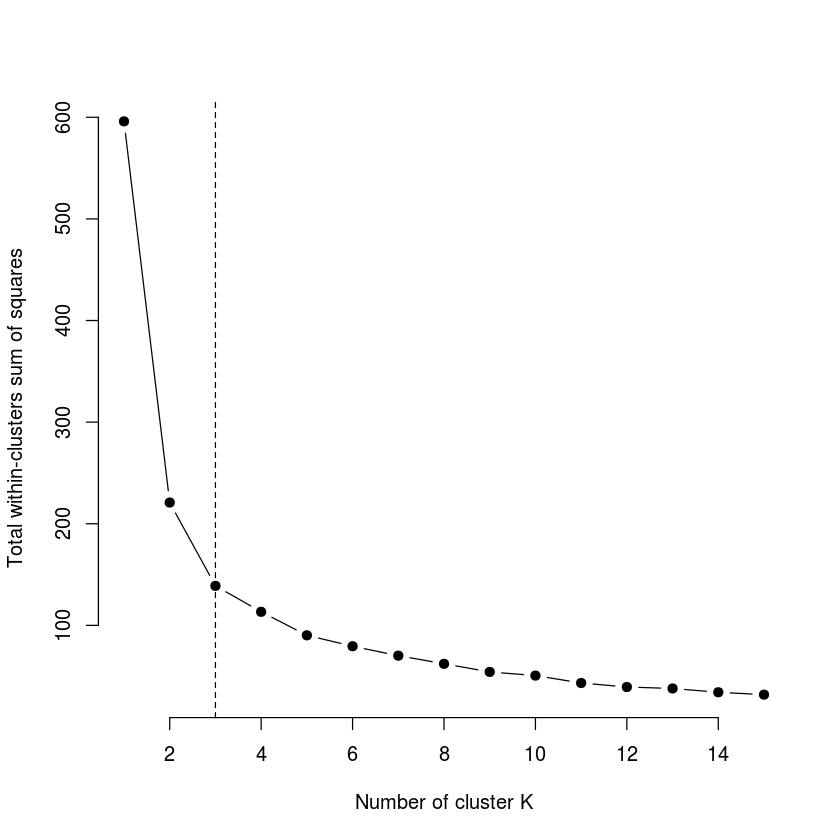

In [12]:
set.seed(123)  
# k值从2到15
k.max = 15
data = iris.scaled
# 这里不必手动计算平方总和，kmeans中已经完成计算，直接调用
wss = sapply(1:k.max,
            function(k){kmeans(data,k,nstart=10)$tot.withinss})
plot(1:k.max, wss,
    type='b', pch=19, frame=FALSE,
    xlab = 'Number of cluster K',
    ylab = "Total within-clusters sum of squares")
abline(v=3, lty=2)

从上面的图，可以看出在k=3这个点上，曲线的变化率比较大，建议选择k=3作为最终的结果。当然你还可以看到k越大，组内平方和总和是越来越小，不过随着k变大，分类结果也更加分散，可能不能很好的表现数据聚类想要表达的信息。

上面的选择最佳k值的过程也可以直接利用一个叫**factoextra**的R包来实现，使用它的提供的**fviz_nbclust()**函数  
```r
fviz_nbclust(x, FUNcluster, method=c('silhourtte', 'wss')
```

> **x**: 输入data frame或数值matrix  
> **FUNclust**：聚类算法，如kmeans，pam，clara等  
> **method**：选择最佳分类数目的算法  

具体的使用例子可以参考

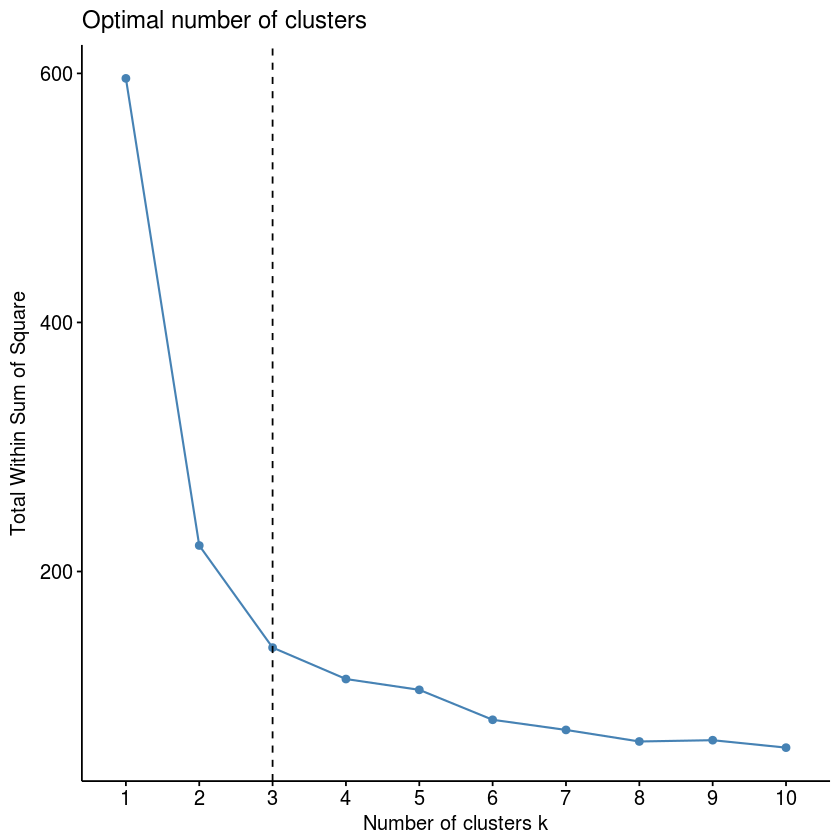

In [17]:
fviz_nbclust(iris.scaled, kmeans, method='wss') + geom_vline(xintercept = 3, linetype=2)
# 这里貌似不能直接给出一个推荐值，需要我们自己从图中寻找一个，也就是k=3

下面试试用PAM聚类的结果进行测试

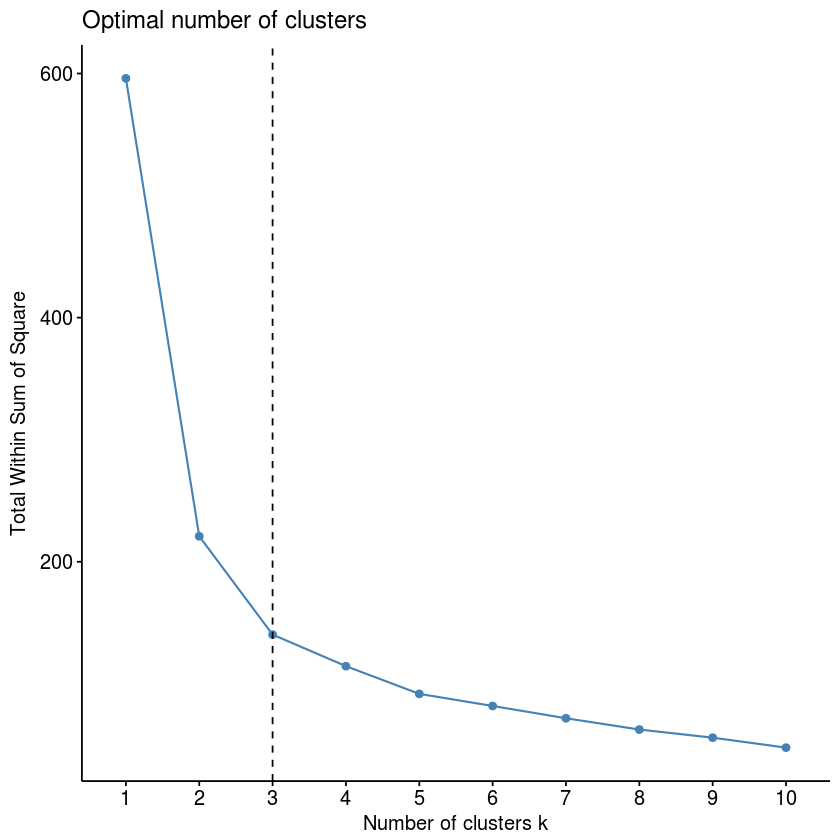

In [19]:
fviz_nbclust(iris.scaled, pam, method='wss') + geom_vline(xintercept = 3, linetype=2)

最终结果也和k-means的聚类结果类似。最后再试试用层次聚类的结果来试试看。使用**factoextra**提供的`hcut`对数据进行聚类并划分分组

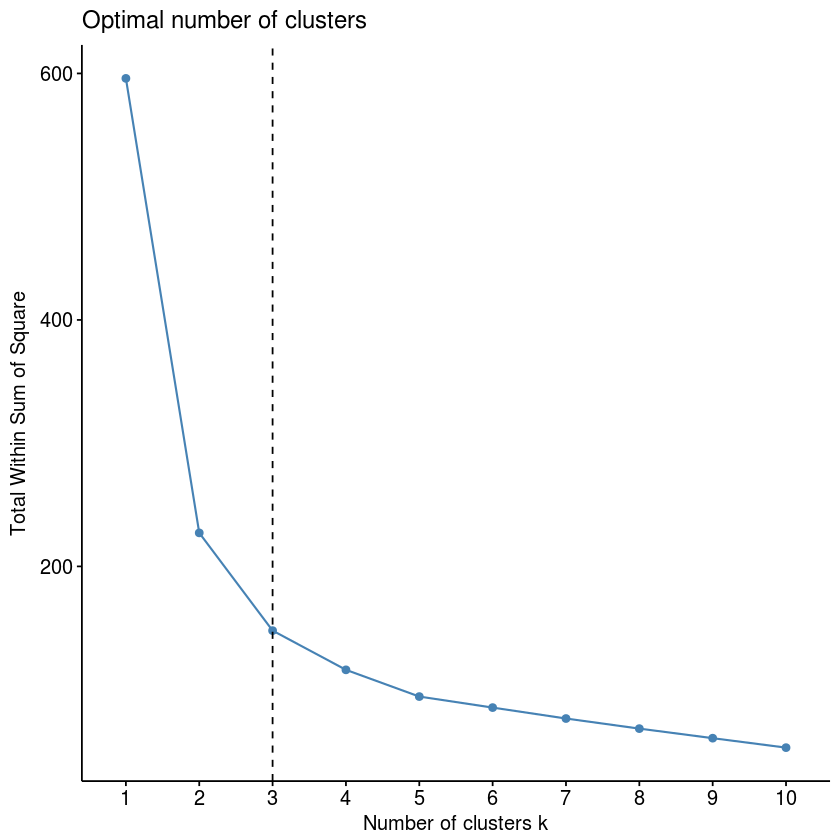

In [21]:
fviz_nbclust(iris.scaled, hcut, method='wss') + geom_vline(xintercept = 3, linetype=2)

如果数据比较复杂的话，Elbow method可能会陷入局部最优的结果，随着k的增大，wss反而又增大的情况。

### 4.2 Average silhouette method
简单来说，该主方法用于评估聚类结果的质量。如果一个聚类的结果比较好，那么它的average silhouette就会比较高。计算过程类似Elbow method：  
> 1. 对不同的k值分别进行聚类  
> 2. 对每个k的聚类结果分别计算average silhouette（avg.sil）值  
> 3. 以k为x轴，avg.sil为y轴绘制连线图  
> 4. avg.sil值最大处就是最优k值  

具体的R执行代码可以利用**cluster**包中的**silhouette()**函数计算average silhouette值。先看看在K-means聚类中的使用

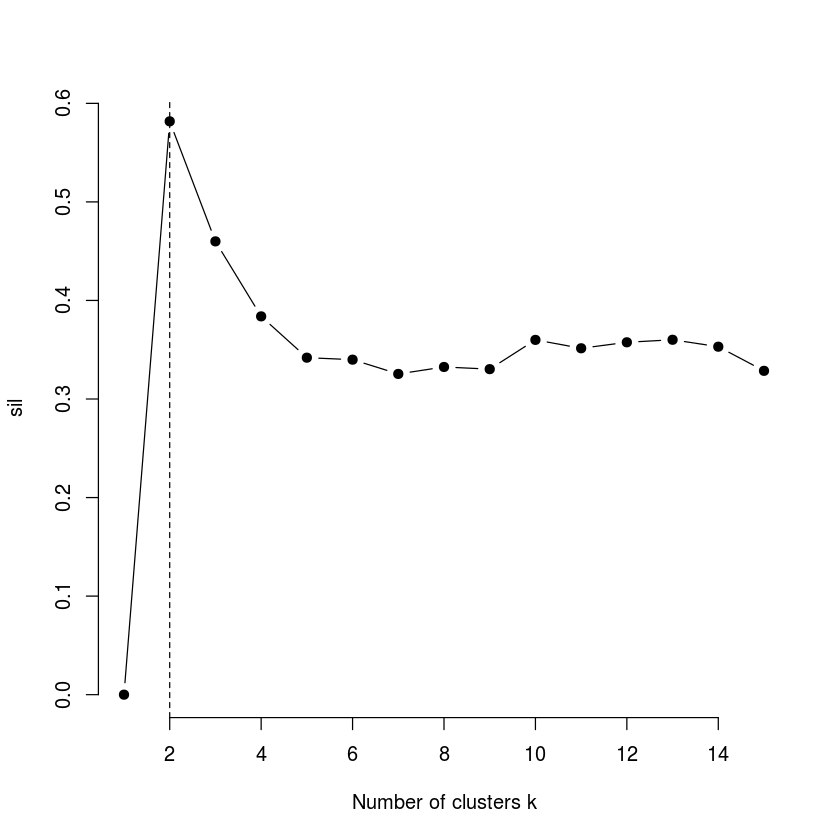

In [4]:
library(cluster)
k.max = 15
data = iris.scaled
sil = rep(0, k.max)
# k从2到15分别进行kmeans 
for (i in 2:k.max){
    km.res = kmeans(data, centers=i, nstart = 25)
    ss = silhouette(km.res$cluster, dist(data))
    sil[i] = mean(ss[,3])
}
# 画图
plot(1:k.max, sil, type='b', pch=19, frame=FALSE, xlab='Number of clusters k')
abline(v=which.max(sil), lty=2)

使用前面用到的**fviz_nbclust()**完成

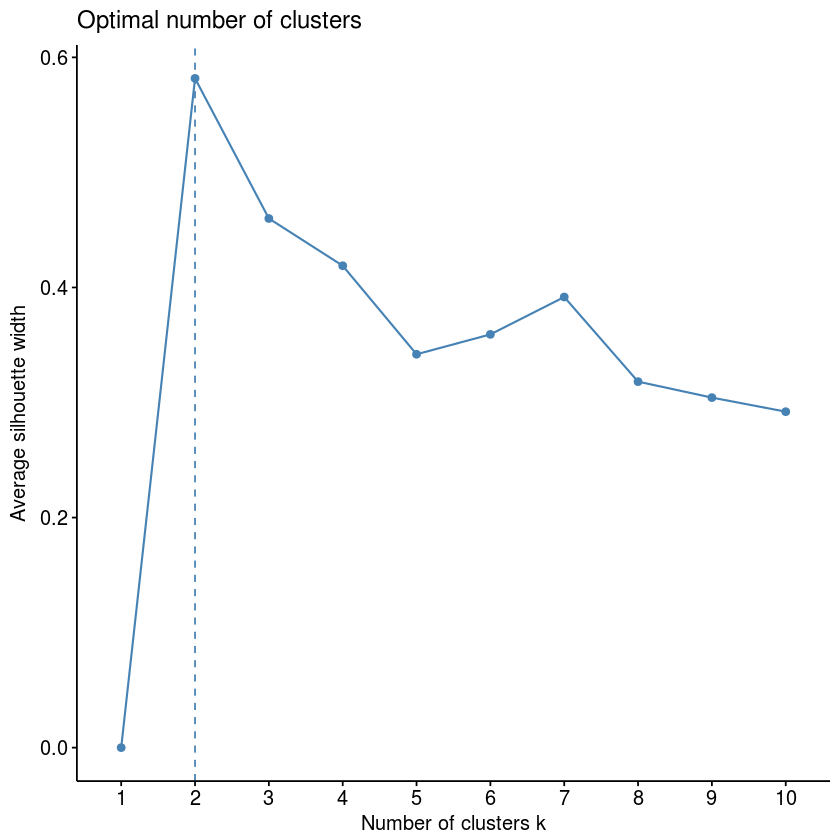

In [11]:
fviz_nbclust(iris.scaled, kmeans, method='silhouette')

下面再介绍在PAM和层次聚类中使用

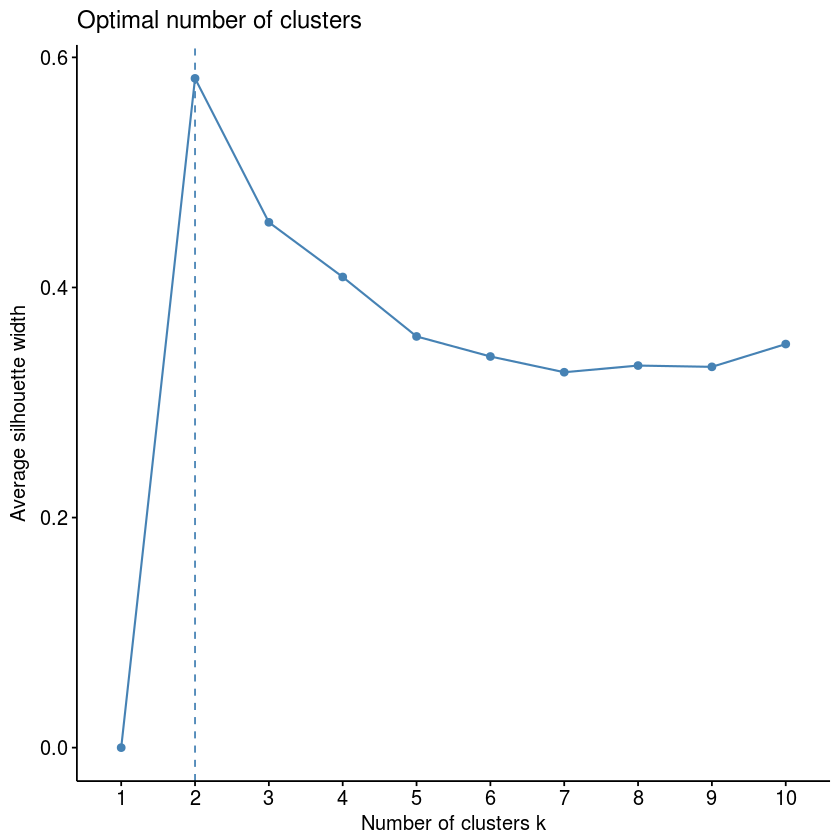

In [10]:
# for PAM clustering  
fviz_nbclust(iris.scaled, pam, method='silhouette')

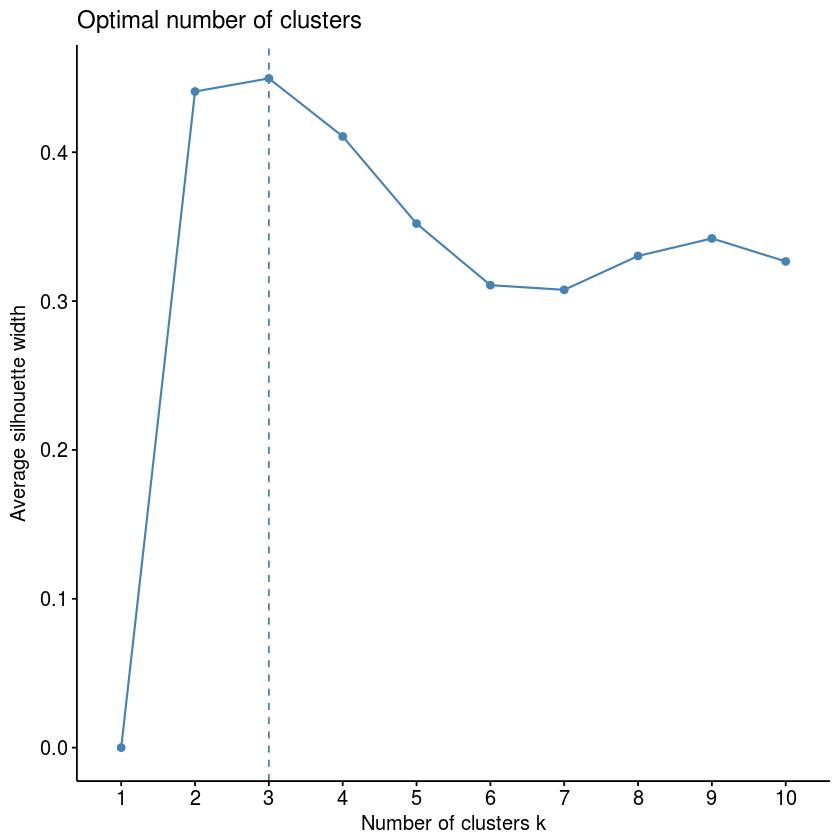

In [13]:
# for hierarchical clustering
fviz_nbclust(iris.scaled, hcut, method='silhouette',hc_method='complete')

**讨论:**前面介绍的Elbow method得到的最佳值，需要我们手动去看，而Average silhouette method会直接提供一个最佳以供选择。而且K-means和PAM的推荐值是k=2，而层次聚类的推荐值是k=3。结合之前的Elbow method结果，设置k=3比较好。

### 4.3 Gap statistic method  
[Gap statistic method](https://web.stanford.edu/~hastie/Papers/gap.pdf)可以运用到任何聚类算法里面。该方法先比较不同k值聚类结果中组内变异量的总和（total within intracluster variation）。利用统计学的假设检验来比较TSS值与那些随机分布的参考数据集之间是否显著差异。参考数据集的产生是根据[蒙特卡罗算法](https://zh.wikipedia.org/wiki/%E8%92%99%E5%9C%B0%E5%8D%A1%E7%BE%85%E6%96%B9%E6%B3%95)生成的[均匀分布](https://zh.wikipedia.org/wiki/%E5%9D%87%E5%8B%BB%E5%88%86%E4%BD%88)的数据集，数据集中的值属于[$min(x_i)$, $max(x_i)$]。  
我们需要进行聚类的数据与参考数据集，Gap statistic值的计算如下。假设我们聚类分成k个cluster，$C_r$表示第r个cluster，$n_r$表示$C_r$中元素的个数。那$C_r$中元素两两距离之和为   
$$
D_r = \sum_{i,i'\in C_r}d_ii'
$$
$i$和$i'$都是属于$C_r$中的元素，$d_{ii'}$的计算可以按照欧拉距离来进行计算。$W_k$的计算方法如下：  
$$ 
W_k = \sum_{r=1}^{k}\frac{1}{2n_r} D_r
$$  
$W_k$称为组内变异量的总和，参考数据与实际数据之间的Gap值
$$ 
Gap_n(k)\;=\;E_n^*{log(W_k)} - log(W_k)
$$   
这里的$E_n^*$表示含有n个样品的参考数据集的期望值，计算过程是采用[自助法（bootstrapping）](https://zh.wikipedia.org/wiki/%E8%87%AA%E5%8A%A9%E6%B3%95)。在零假设的条件下，Gap值可以衡量其与参考数据偏离程度。从不同的k值中选择Gap值最大的k值，记为$\hat k$，这时的聚类结果与均匀分布的参考数据集相差最大，可以选为最佳聚类数目。  
为了能够计算标记误（standard error）$s_k$，需要先计算参考数据集的$log(W_k)$的标准差$sd_k$：  
$$ 
s_k = sd_k \times \sqrt{1+\frac{1}{B}}
$$
最后选择最佳聚类数目可以用一个更加鲁棒性的过程来表示，也就选择一个最小的k值，满足：  
$$
Gap(k) \ge Gap(k+1) - s_{k+1}
$$

计算过程：
1. 根据不同的k值对实际数据进行聚类并计算$W_k$
2. 产生B个参考数据集（bootstrap法），按照不同的k值进行聚类，并计算Gap值：$Gap(k) = \frac{1}{B}\sum_{b=1}^{B}log(W_k^*) - log(W_k)$
3. 让$\bar{w} = (\frac{1}{B}\sum_{b}log(W_{kb}^*))$，计算标准差$sd(k) = \sqrt{\frac{1}{B}\sum_b(log(W_{kb}^*)-\bar{w})^2}$和标准误$s_k = sd_k \times \sqrt{1+\frac{1}{B}}$
4. 选择满足$Gap(k) \ge Gap(k+1) - s_{k+1}$的最小k值

R语言里面的实现方法可以利用**cluster**包中的 **clusGap()**来计算  
```r
clusGap(x, FUNcluster, K.max, B = 100, verbose = TRUE, ...)  
```

> + **x**: numeric matrix or data frame
+ **FUNcluster**: a function (e.g.: kmeans, pam, …) which accepts i) a data matrix like x as first argument; ii) the number of clusters desired (k > = 2) as a second argument; and returns a list containing a component named cluster which is a vector of length n=nrow(x)
of integers in 1:k determining the clustering or grouping of the n observations.
+ **K.max**: the maximum number of clusters to consider, must be at least two.
+ **B**: the number of Monte Carlo (“bootstrap”) samples.
+ **verbose**: if TRUE, the computing progression is shown.
+ **…**: Further arguments for FUNcluster(), see kmeans example below.

对3种聚类方法进行测试：


In [5]:
library(cluster)
set.seed(123)
# 一般认为B=500就能得到一个比较好的结果，这里设为50以提高计算速度
gap_stat = clusGap(iris.scaled, FUN=kmeans, nstart=25, K.max=10, B=50)

print(gap_stat, method='firstmax')

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = iris.scaled, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 3
          logW   E.logW       gap     SE.sim
 [1,] 4.534565 4.754595 0.2200304 0.02504585
 [2,] 4.021316 4.489687 0.4683711 0.02742112
 [3,] 3.806577 4.295715 0.4891381 0.02384746
 [4,] 3.699263 4.143675 0.4444115 0.02093871
 [5,] 3.589284 4.052262 0.4629781 0.02036366
 [6,] 3.519726 3.972254 0.4525278 0.02049566
 [7,] 3.448288 3.905945 0.4576568 0.02106987
 [8,] 3.398210 3.850807 0.4525967 0.01969193
 [9,] 3.334279 3.802315 0.4680368 0.01905974
[10,] 3.250246 3.759661 0.5094149 0.01928183


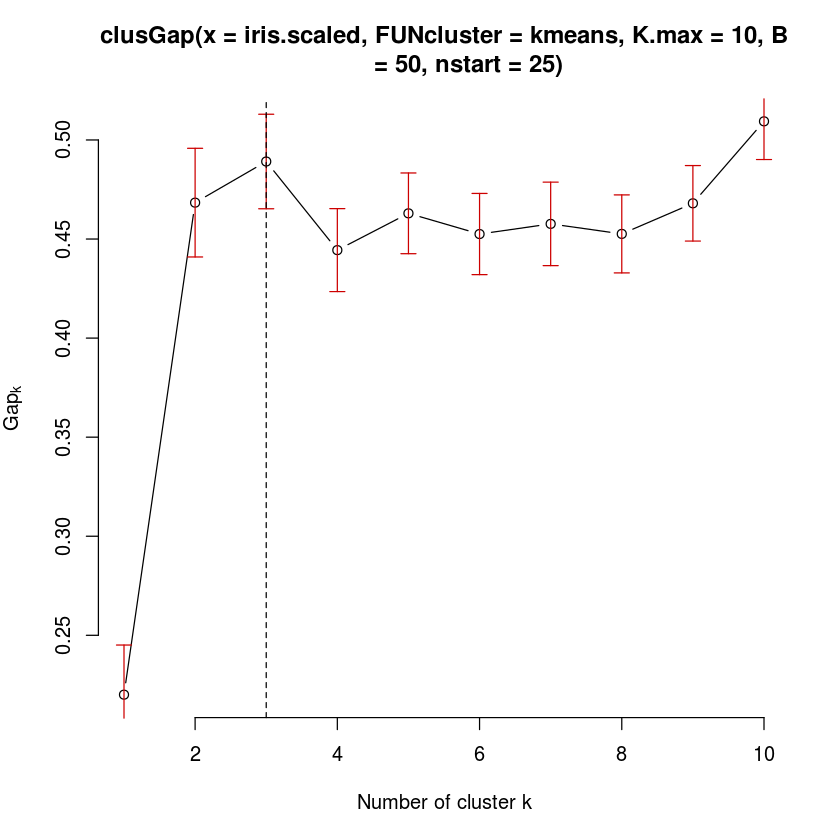

In [6]:
# 绘图
plot(gap_stat, frame=FALSE, xlab='Number of cluster k')
abline(v=3, lty=2)

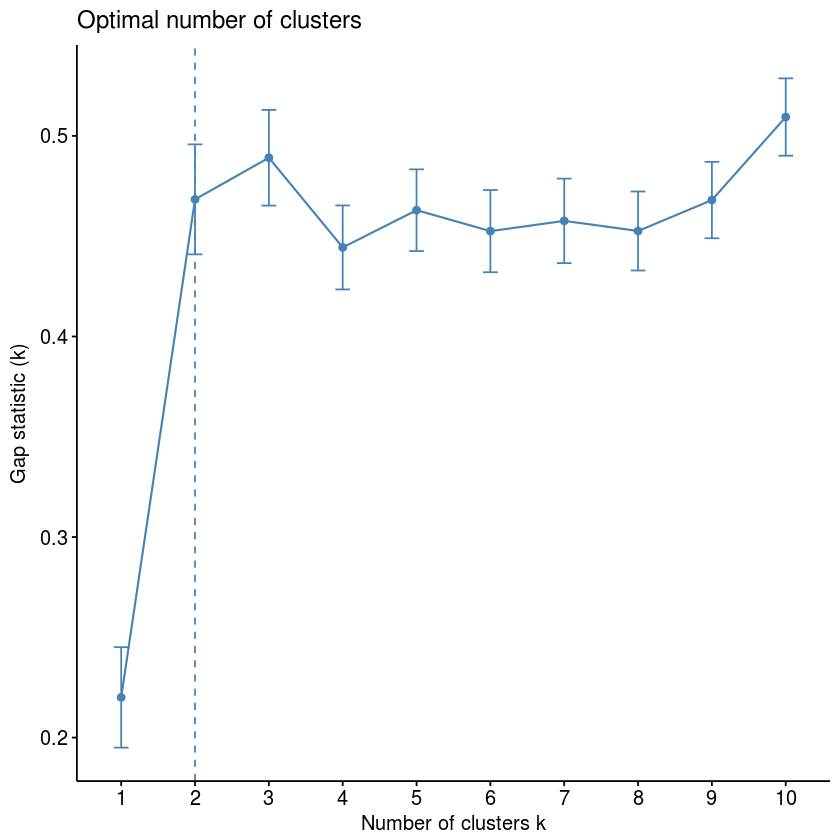

In [10]:
# 使用factoextra
fviz_gap_stat(gap_stat)

这里的最佳聚类数目是用**firstmax**方法（查看`?cluster::maxSE`）计算的，Tibshirani et al (2001)提出的方法可以参考下面脚本：

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = iris.scaled, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'Tibs2001SEmax', SE.factor=1): 2
          logW   E.logW       gap     SE.sim
 [1,] 4.534565 4.754595 0.2200304 0.02504585
 [2,] 4.021316 4.489687 0.4683711 0.02742112
 [3,] 3.806577 4.295715 0.4891381 0.02384746
 [4,] 3.699263 4.143675 0.4444115 0.02093871
 [5,] 3.589284 4.052262 0.4629781 0.02036366
 [6,] 3.519726 3.972254 0.4525278 0.02049566
 [7,] 3.448288 3.905945 0.4576568 0.02106987
 [8,] 3.398210 3.850807 0.4525967 0.01969193
 [9,] 3.334279 3.802315 0.4680368 0.01905974
[10,] 3.250246 3.759661 0.5094149 0.01928183


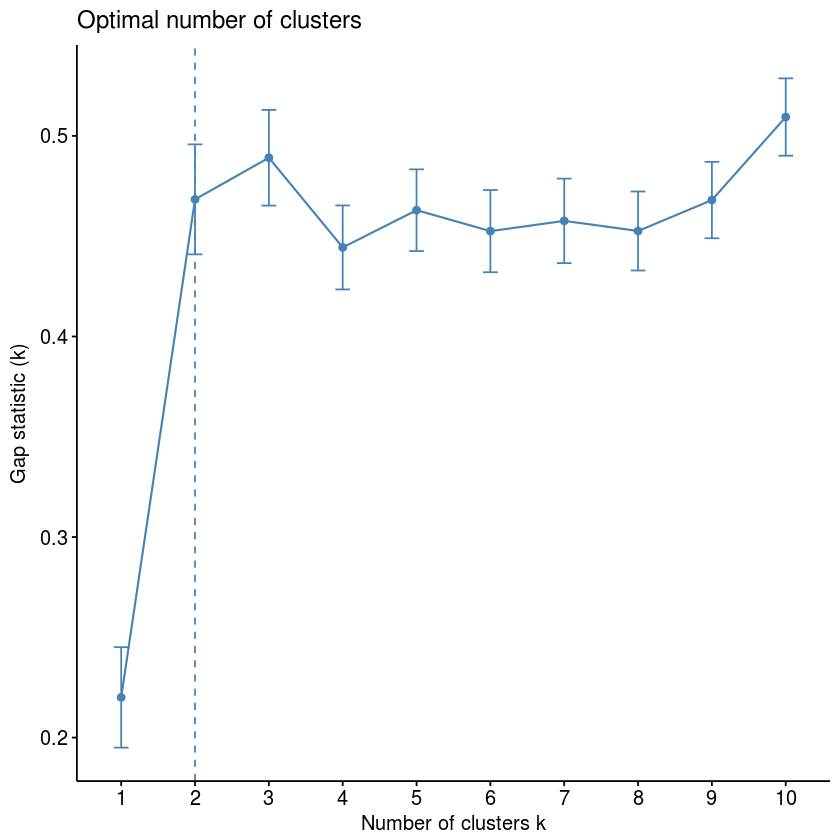

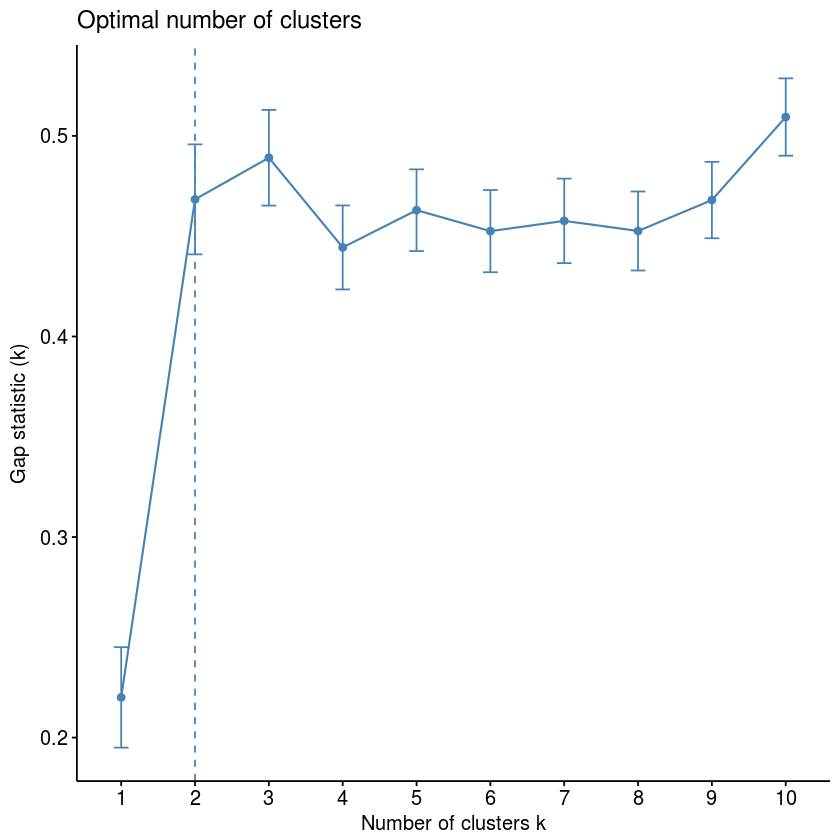

In [11]:
# Print
print(gap_stat, method = "Tibs2001SEmax")
# Plot
fviz_gap_stat(gap_stat, 
              maxSE = list(method = "Tibs2001SEmax"))
# Relaxed the gap test to be within two standard deviations
fviz_gap_stat(gap_stat, 
          maxSE = list(method = "Tibs2001SEmax", SE.factor = 2))

PAM和层次聚类的结果

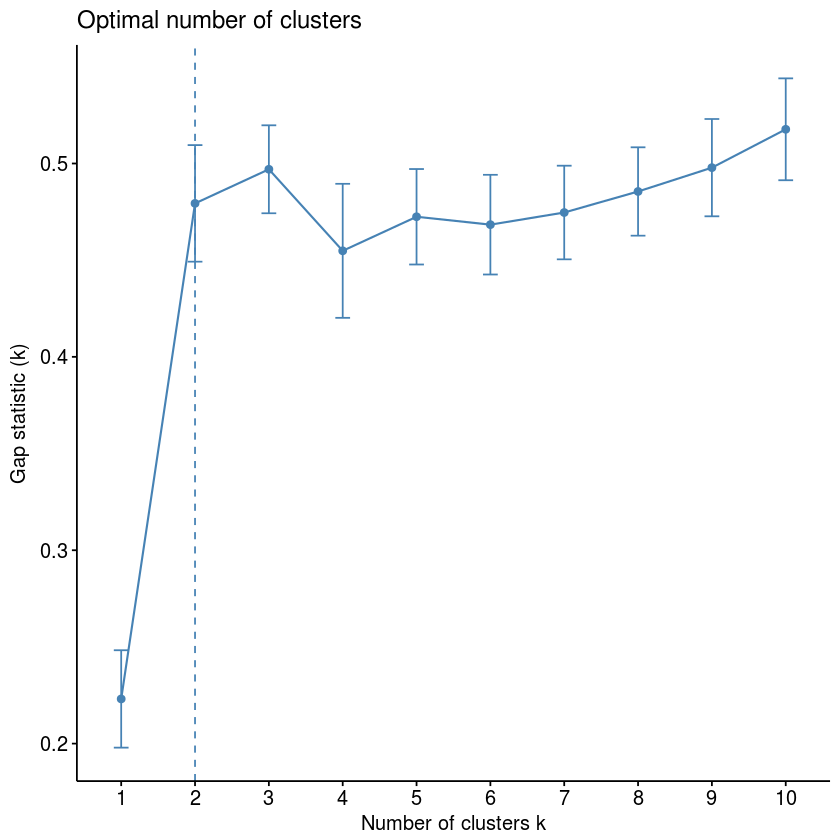

In [12]:
# PAM聚类结果 
set.seed(123)
gap_stat <- clusGap(iris.scaled, FUN = pam, K.max = 10, B = 50)
# Plot gap statistic
fviz_gap_stat(gap_stat)

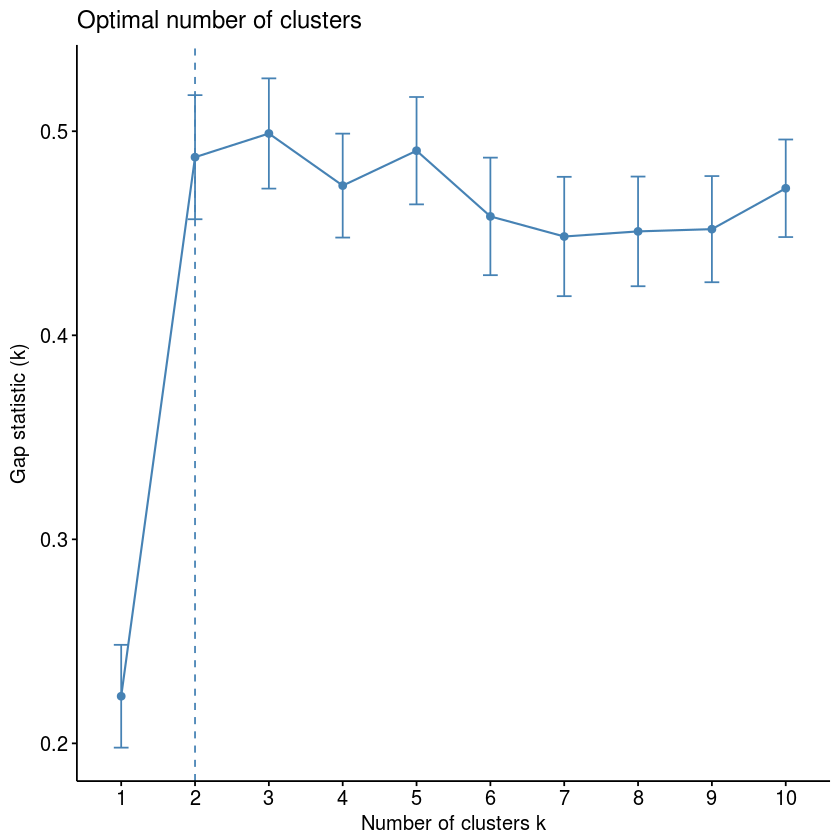

In [13]:
# Compute gap statistic
set.seed(123)
gap_stat <- clusGap(iris.scaled, FUN = hcut, K.max = 10, B = 50)
# Plot gap statistic
fviz_gap_stat(gap_stat)